In [91]:
import os
import numpy as np
from sklearn import mixture
import pandas as pd
import re
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
#change path
path="..\\UB_keystroke_dataset\\S0"

In [3]:
def ReadListOfTextFilesFromDirectoryWalk(path):
    """Read all text files from given directory and its sudirectories and return list of text files path"""
    files = []
    # r=root, d=directories, f = files
    for r, d, f in os.walk(path):
        for file in f:
            if '.txt' in file:
                files.append(os.path.join(r, file))
    return files



In [4]:
files=ReadListOfTextFilesFromDirectoryWalk(path)
len(files)
print(files[0:1])

['..\\UB_keystroke_dataset\\S0\\baseline\\001000.txt']


In [5]:
def CreateListOfTuplesFromFile(files):
#Reading file and create tuple 
    items = []
    for file in files:
        filename=file.split('\\')[-1].split('.')[0]
        f=open(file, "r")
        for line in f:
            words= line.rstrip('\n').split(sep=" ")
            items.append((words[0],words[1],words[2],filename))
    return items


In [71]:
items=CreateListOfTuplesFromFile(files[0:10])
items

[('LMenu', 'KeyDown', '63578429757751', '001000'),
 ('Tab', 'KeyDown', '63578429757861', '001000'),
 ('LMenu', 'KeyUp', '63578429757970', '001000'),
 ('Tab', 'KeyUp', '63578429757985', '001000'),
 ('LMenu', 'KeyDown', '63578429761511', '001000'),
 ('Tab', 'KeyDown', '63578429761589', '001000'),
 ('LMenu', 'KeyUp', '63578429761698', '001000'),
 ('Tab', 'KeyUp', '63578429761729', '001000'),
 ('LMenu', 'KeyDown', '63578429762229', '001000'),
 ('Tab', 'KeyDown', '63578429762291', '001000'),
 ('LMenu', 'KeyUp', '63578429762416', '001000'),
 ('Tab', 'KeyUp', '63578429762447', '001000'),
 ('LMenu', 'KeyDown', '63578429762837', '001000'),
 ('Tab', 'KeyDown', '63578429762931', '001000'),
 ('Tab', 'KeyUp', '63578429763071', '001000'),
 ('Tab', 'KeyDown', '63578429763789', '001000'),
 ('Tab', 'KeyUp', '63578429763882', '001000'),
 ('LMenu', 'KeyUp', '63578429764085', '001000'),
 ('D0', 'KeyDown', '63578429768578', '001000'),
 ('D0', 'KeyUp', '63578429768656', '001000'),
 ('D0', 'KeyDown', '635784

In [72]:
#Creating dataframes
def CreateDataFrame(items,columns):
    df = pd.DataFrame.from_records(items, columns=['Key', 'EventType','Time','User'])
    return df

In [73]:
df=CreateDataFrame(items,columns=['Key', 'EventType','Time','User'])
print (df.shape)
#
df.head(10)

(60044, 4)


,Key,EventType,Time,User
0,LMenu,KeyDown,63578429757751,001000
1,Tab,KeyDown,63578429757861,001000
2,LMenu,KeyUp,63578429757970,001000
3,Tab,KeyUp,63578429757985,001000
4,LMenu,KeyDown,63578429761511,001000
5,Tab,KeyDown,63578429761589,001000
6,LMenu,KeyUp,63578429761698,001000
7,Tab,KeyUp,63578429761729,001000
8,LMenu,KeyDown,63578429762229,001000
9,Tab,KeyDown,63578429762291,001000


In [74]:
def ParseAlphabetsKeys(df):
    """Return only alphabets records"""
    dfAlphabets=df[df["Key"].str.match('^.*[A-Z]$')]
    return dfAlphabets

In [105]:
temp=ParseAlphabetsKeys(df)
temp.groupby("Key").size()/2

,Key,EventType,Time,User
47,I,KeyDown,63578429792602,001000
48,I,KeyUp,63578429792696,001000
52,A,KeyDown,63578429792961,001000
53,A,KeyUp,63578429793054,001000
54,M,KeyDown,63578429793257,001000
55,M,KeyUp,63578429793382,001000
58,H,KeyDown,63578429793616,001000
59,H,KeyUp,63578429793741,001000
60,O,KeyDown,63578429793756,001000
61,O,KeyUp,63578429793881,001000


In [76]:
def GetTimeDifferenceofKeyDownDown(data):
    prev=0
    rows=[]
    for index,row in data.iterrows():
        if prev==0 and row[1]=="KeyDown":
            prevRow=row
            prev=1
        elif row[1]=="KeyDown":
            rows.append([ prevRow[0], row[0], int(row[2])- int(prevRow[2]),row[3]])
            prevRow=row
    return rows

In [206]:
keyDownDownTimeDifference=GetTimeDifferenceofKeyDownDown(data=temp)
keyDownDownTimeDifference


[['I', 'A', 359, '001000'],
 ['A', 'M', 296, '001000'],
 ['M', 'H', 359, '001000'],
 ['H', 'O', 140, '001000'],
 ['O', 'N', 141, '001000'],
 ['N', 'E', 296, '001000'],
 ['E', 'O', 2980, '001000'],
 ['O', 'R', 62, '001000'],
 ['R', 'E', 78, '001000'],
 ['E', 'D', 515, '001000'],
 ['D', 'T', 281, '001000'],
 ['T', 'O', 187, '001000'],
 ['O', 'B', 250, '001000'],
 ['B', 'E', 187, '001000'],
 ['E', 'W', 343, '001000'],
 ['W', 'I', 140, '001000'],
 ['I', 'T', 63, '001000'],
 ['T', 'H', 1092, '001000'],
 ['H', 'Y', 1357, '001000'],
 ['Y', 'O', 172, '001000'],
 ['O', 'U', 62, '001000'],
 ['U', 'T', 203, '001000'],
 ['T', 'O', 187, '001000'],
 ['O', 'D', 140, '001000'],
 ['D', 'A', 63, '001000'],
 ['A', 'Y', 343, '001000'],
 ['Y', 'A', 1076, '001000'],
 ['A', 'A', 983, '001000'],
 ['A', 'T', 141, '001000'],
 ['T', 'Y', 374, '001000'],
 ['Y', 'O', 187, '001000'],
 ['O', 'U', 78, '001000'],
 ['U', 'R', 141, '001000'],
 ['R', 'C', 405, '001000'],
 ['C', 'O', 109, '001000'],
 ['O', 'M', 172, '0010

In [221]:
def GetDictionaryOfFeatureVectors(keyDownDownTimeDifference):
    """
    Take List of arrays and return dictionary of 26*26 vector for each user
    """
    dictFV=dict()
    for xi in keyDownDownTimeDifference:
        if xi[3] not in dictFV:
            dictFV[xi[3]]=np.zeros(26*26,dtype=object)
            
        index=(ord(xi[0])-65)*26+np.absolute(ord(xi[1])-65)
        if dictFV[xi[3]][index]==0:
            dictFV[xi[3]][index]=[]
        if xi[2] < 1000:
            dictFV[xi[3]][index].append(xi[2])
    return dictFV


In [120]:
FeatureVectors=GetDictionaryOfFeatureVectors(keyDownDownTimeDifference) 
usersFV=pd.DataFrame.from_dict(FeatureVectors)
user=usersFV[usersFV.columns[0]]
user=pd.DataFrame(user)

,001000
0,"[983, 609, 1919, 905]"
1,"[171, 266, 156, 172, 219, 187]"
2,"[390, 436, 748, 203, 250, 1077, 203, 172, 281]"
3,"[249, 266, 1014, 249, 234, 218, 203, 218, 156,..."
4,"[671, 2278]"
5,"[156, 359, 421]"
6,[733]
7,"[530, 390]"
8,"[141, 171, 422]"
9,0


In [102]:
FeatureVectors=GetDictionaryOfFeatureVectors(keyDownDownTimeDifference) 
usersFV=pd.DataFrame.from_dict(FeatureVectors)
GMMData=[]
for user in usersFV.columns:
    maxLength=0
    for userF in usersFV[user]:
        if userF==0:
            userF=[]
        featureLenght=len(userF)
        if featureLenght > maxLength:
            maxLength=featureLenght
    userDF=pd.DataFrame(index=range(0,676))
    userData=np.zeros((maxLength,676))
    row=0
    for userF in usersFV[user]:
        column=0
        if userF==0:
            userF=[]
        availableValuesCount=len(userF)
        sum=0
        userFNP=np.array(userF)
        std= userFNP.std()
        for value in userF:
            userData[column][row]=value
            column=column+1
            sum=sum+value
        if availableValuesCount==0:
            mean=0
            std=0
        else:
            mean=sum/availableValuesCount
        
        
        
        gussianValues=np.random.normal(mean,std,maxLength-availableValuesCount)
        for value in gussianValues:
            
            userData[column][row]=value
            column=column+1
        
        row=row+1
    print(userData.shape)
    if len(GMMData)==0:
        GMMData=userData
    else:
        GMMData=np.append(GMMData,userData,axis=0)

print(GMMData.shape)


C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\numpy\core\_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(66, 676)
(48, 676)
(67, 676)
(37, 676)
(67, 676)
(38, 676)
(90, 676)
(32, 676)
(52, 676)
(37, 676)
(534, 676)


<BarContainer object of 66 artists>

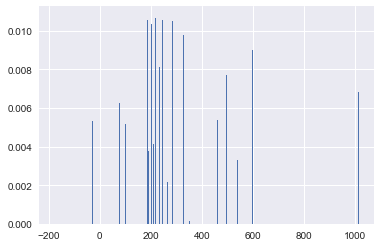

In [104]:

std=np.std(GMMData[0:66,1], axis=0)
mean= np.mean(GMMData[0:66,1])
plt.bar(GMMData[0:66,3], stats.norm.pdf(GMMData[0:66,1], mean, std))

#plt.bar()


In [96]:
print(GMMData[0:66,1])
print(np.std(GMMData[0:66,1], axis=0)
,np.mean(GMMData[0:66,1]))

[171.         266.         156.         172.         219.
 187.         199.97206142 196.335722   194.25020368 190.99049223
 194.43869698 192.54139766 192.30652163 194.59256268 189.50882501
 192.70947971 188.95690645 194.68759937 197.60911211 196.52416287
 193.67021422 196.58789753 198.85742577 189.64160304 194.32529174
 192.69915836 198.23405262 194.85321102 196.59173987 189.60071372
 196.13607843 200.82427258 197.44619576 197.09378912 195.99311291
 196.2657357  190.58178698 196.77761478 193.23309015 199.6486618
 196.23041131 196.9288102  192.26792593 200.46776836 195.16638995
 195.50372989 190.50395186 196.81431081 198.79943257 196.82245432
 193.27105875 188.70441357 193.63974442 197.36483007 196.20373712
 192.55530928 198.27922864 197.15312717 187.63014159 196.26476587
 196.28757508 192.07710616 197.85364131 196.83124138 191.5879607
 195.02793879]
11.600972294961242 194.93518780294625


In [110]:
x1='Z'
x2='P'
(ord(x1)-65)*26+np.absolute(ord(x2)-65)


665

In [61]:
x1='Z'
x2='Z'
(ord(x1)-65)*26+np.absolute(ord(x2)-65)


675

In [62]:
def GetGMMFormatDataFromDataFrame(usersFV):
    GMMData=[]
    for user in usersFV.columns:
        maxLength=0
        for userF in usersFV[user]:
            if userF==0:
                userF=[]
            featureLenght=len(userF)
            if featureLenght > maxLength:
                maxLength=featureLenght
        userDF=pd.DataFrame(index=range(0,676))
        userData=np.zeros((maxLength,676))
        row=0
        for userF in usersFV[user]:
            column=0
            if userF==0:
                userF=[]
            availableValuesCount=len(userF)
            sum=0
            for value in userF:
                userData[column][row]=value
                column=column+1
                sum=sum+value
            if availableValuesCount==0:
                mean=0
            else:
                mean=sum/availableValuesCount
            gussianValues=np.random.normal(mean,3,maxLength-availableValuesCount)
            for value in gussianValues:
            
                userData[column][row]=mean
                column=column+1
        
            row=row+1
        print(userData.shape)
        if len(GMMData)==0:
            GMMData=userData
        else:
            GMMData=np.append(GMMData,userData,axis=0)
    return GMMData


In [63]:
data= GetGMMFormatDataFromDataFrame(usersFV)
len(data)


(66, 676)
(48, 676)


114

In [64]:
def GetAverageFeatureVectors(FeatureVectors):
    
    averageFV= np.zeros(26*26,dtype=object)
    index=0
    for xi in FeatureVectors:
        tempSum=np.array(xi).sum()
        if type(xi)== list:
            averageFV[index]=tempSum/len(xi)
        index=index+1
    return averageFV

In [65]:
for user in FeatureVectors:
    GetAverageFeatureVectors(FeatureVectors[user])

In [47]:
testPath='..\\UB_keystroke_dataset\\UB_keystroke_dataset\\s1\\baseline\\001000.txt'
g = mixture.GMM(n_components=2)
g.fit(data)
np.round(g.weights_, 2)

C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\sklearn\utils\deprec

array([0.58, 0.42])

In [222]:
def TrainModel(path):
    """Get path of data files and train a GMM model"""
    files=ReadListOfTextFilesFromDirectoryWalk(path)
    # I am training on first 10 users
    dataFileFormat=CreateListOfTuplesFromFile(files[0:10])
    df=CreateDataFrame(dataFileFormat,columns=['Key', 'EventType','Time','User'])
    alphabetsDF=ParseAlphabetsKeys(df)
    keyDownDownTimeDifference=GetTimeDifferenceofKeyDownDown(data=alphabetsDF)
    FeatureVectors=GetDictionaryOfFeatureVectors(keyDownDownTimeDifference) 
    usersFV=pd.DataFrame.from_dict(FeatureVectors)
    data= GetGMMFormatDataFromDataFrame(usersFV)
    g = mixture.GMM(n_components=10)
    print(len(data))
    g.fit(data)
    return g
    


In [223]:
GMM= TrainModel("..\\UB_keystroke_dataset\\S1")

(62, 676)
(44, 676)
(57, 676)
(30, 676)
(57, 676)
(33, 676)
(62, 676)
(30, 676)
(44, 676)
(23, 676)
442


C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\sklearn\utils\deprec

In [224]:
GMM.weights_

array([0.14027149, 0.00226244, 0.13800905, 0.15158371, 0.12895928,
       0.12895928, 0.09954751, 0.0678733 , 0.0678733 , 0.07466063])

In [254]:
def TestModel(path,g):
    """Get path of data files and test a GMM model"""
    GMMData=[]
    files=ReadListOfTextFilesFromDirectoryWalk(path)
    dataFileFormat=CreateListOfTuplesFromFile(files[0:100])
    df=CreateDataFrame(dataFileFormat,columns=['Key', 'EventType','Time','User'])
    alphabetsDF=ParseAlphabetsKeys(df)
    keyDownDownTimeDifference=GetTimeDifferenceofKeyDownDown(data=alphabetsDF)
    FeatureVectors=GetDictionaryOfFeatureVectors(keyDownDownTimeDifference) 
    usersFV=pd.DataFrame.from_dict(FeatureVectors)
    for user in FeatureVectors:
        data=GetAverageFeatureVectors(FeatureVectors[user])
        dataNP=np.array(data,dtype=np.float64)
        dataNP[np.isnan(dataNP)]=0
        dataNP=dataNP.reshape((1,676))
        
        
        if len(GMMData)==0:
            GMMData=dataNP
        else:
            GMMData=np.append(GMMData,dataNP,axis=0)
    print(GMMData.shape)
    print(len(GMMData))
    
    print(g.predict_proba(GMMData))
    return g.predict(GMMData)
    

In [255]:
predictions=TestModel("..\\UB_keystroke_dataset\\S2",GMM)
predictions


C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in double_scalars
  


(100, 676)
100
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0.

C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
C:\Users\Muhammad Umsan\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)


array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 3, 3, 3, 2, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3], dtype=int64)

In [252]:
GMM.covars_.shape

(10, 676)